# Hyperparameters vs Model Parameters


### Model Parameter:
* Learned during training from the data
* Used for predictions
* Example: weights of a linear classifier



### Hyperparamter:
* Paramters that define the hypothesis space and the learning process
* Can define the complexity of the model
* Cannot be learned within training itself
* Values are set before training
  
  
  



# Types of Hyperparameters

## Example 1: Learning Rate

$$ \theta_{j}\leftarrow\theta_{j}-\alpha\cdot\frac{\partial L}{\partial\theta_{j}} $$
![alt text](lr.png "Title")

[image source](https://towardsdatascience.com/what-are-hyperparameters-and-how-to-tune-the-hyperparameters-in-a-deep-neural-network-d0604917584a)



## Example 2: K-Means Clustering - number of clusters

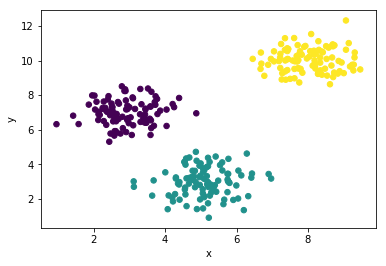

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs

n_components = 3
centers = np.array([[3, 7], [5, 3], [8, 10]])
stds = [0.7] * 3
X, y = make_blobs(n_samples=300, centers=centers, n_features=2,
                      cluster_std = stds, 
                      random_state=3)

plt.scatter(X[:, 0], X[:, 1], s=30, c=y)
plt.xlabel("x")
plt.ylabel("y");



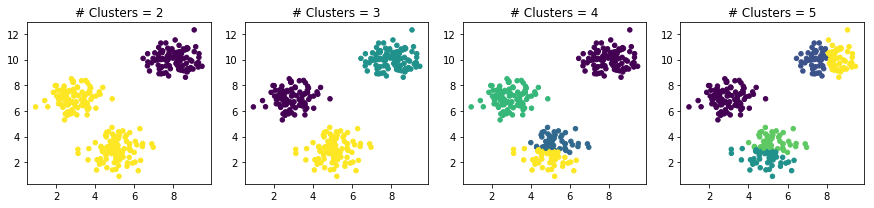

In [2]:
from sklearn.cluster import KMeans

fig = plt.figure(figsize=(15,3))
total_clusters = 4

for i in range(2, total_clusters + 2):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    preds = kmeans.predict(X)
    fig.add_subplot(1, total_clusters + 1, i)
    plt.title("# Clusters = " + str(i))
    plt.scatter(X[:, 0], X[:, 1], s=20, c=preds)

plt.tight_layout()
plt.show()


## How to choose the right hyperparamters?
* Manual experimenting
* Experience and inutition
* Manual tuning is very inefficient and might yield sub-optimal results
* For some problems, hyperparams that in most cases work well are known
* Hyperparameter optimization

# Hyperparamter Optimization

A process for choosing the optimal hyperparameters such that our learning algorithm gives us an optimal model

## Grid Search
* For each hyperparameter - set some specified values
* Train the learning algorithm on each tuple from all their possible combinations
* Evaluate the performance of each of the trained models(e.g cross validation)
* Choose the best tuple of hyperparameters




If we have 2 hyperparameters - $ (\alpha, \beta) $


$ \alpha=\{5, 10\} $


$ \beta=\{1, 2, 3\} $

The grid:

In [3]:
import itertools
alphas = [5, 10]
betas = [1, 2, 3]
for i in itertools.product(alphas, betas):
    print(i)

(5, 1)
(5, 2)
(5, 3)
(10, 1)
(10, 2)
(10, 3)


## Random Search
* Instead of trying all possible combinations - randomly select values for a combination
* Might perform better than grid search, depending on how many hyperparameters actually effect the performance.

![alt text](search.png "Title")

[image source](https://jmlr.csail.mit.edu/papers/volume13/bergstra12a/bergstra12a.pdf)


## Example 3: Polynomial Regression - Degree of the Polynomial


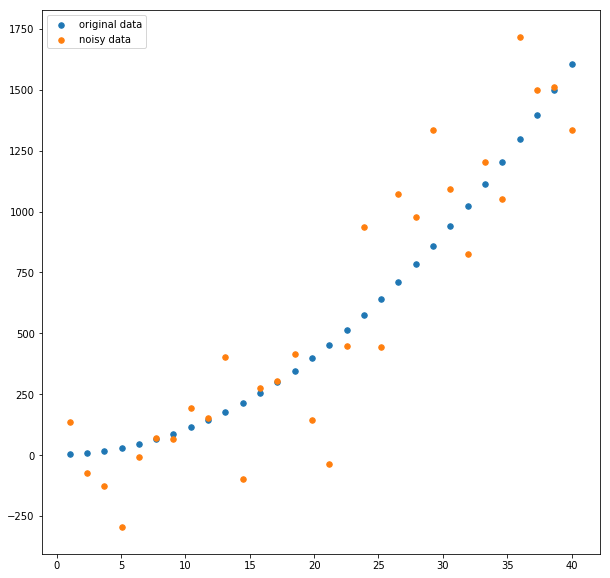

In [30]:
n = 30
noise_std = 200

noise = np.random.normal(0, noise_std, n)

x = np.linspace(1, 40, num=n)

y = x**2 + 5

y_noisy = y + noise

plt.figure(figsize=(10,10))

clean_plt = plt.scatter(x, y, s=30, label="original data")
noisy_plt = plt.scatter(x, y_noisy, s=30, label="noisy data")

plt.legend(handles=[clean_plt, noisy_plt])

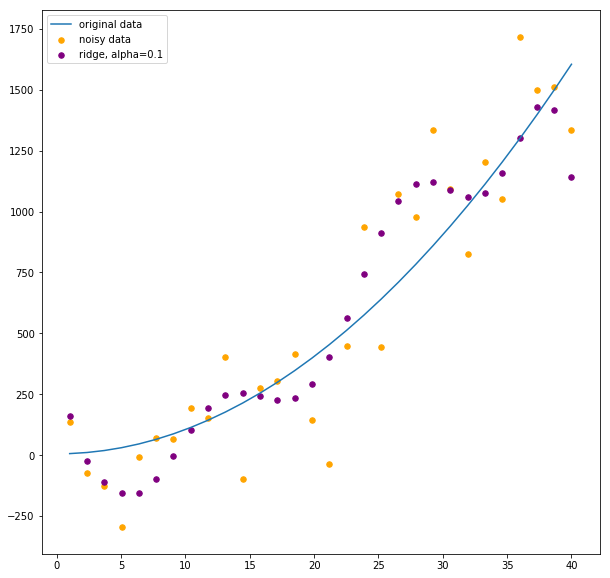

In [31]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

X = x.reshape(-1, 1)

reg = 0
model_low = Ridge(alpha=reg)

poly = PolynomialFeatures(10)
X_p = poly.fit_transform(X)

model_low.fit(X_p, y_noisy)
preds_low = model_low.predict(X_p)


s = 30
plt.figure(figsize=(10,10))
clean_plt, = plt.plot(x, y, label="original data")
noisy_plt = plt.scatter(x, y_noisy, s=s, label="noisy data", c="orange")
ridge_plt = plt.scatter(x, preds_low, s=s, label="ridge, alpha=0.1",c="purple")
plt.legend(handles=[clean_plt, noisy_plt, ridge_plt])



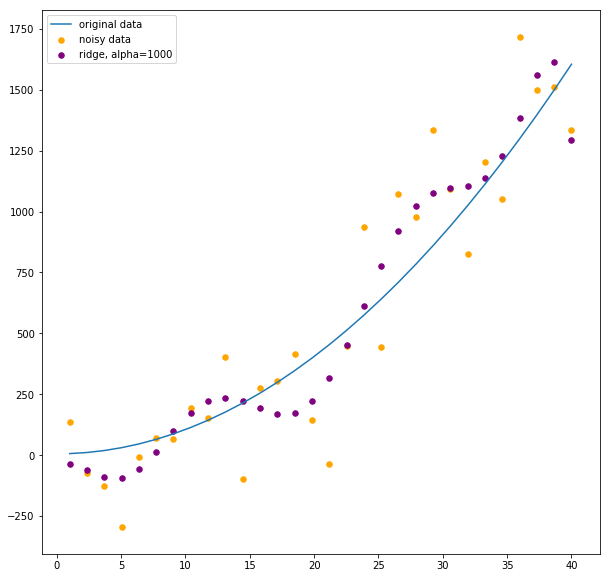

In [32]:
reg = 1000
model_high = Ridge(alpha=reg)

s = 30
plt.figure(figsize=(10,10))

model_high.fit(X_p, y_noisy)
preds_high = model_high.predict(X_p)

clean_plt, = plt.plot(x, y, label="original data")
noisy_plt = plt.scatter(x, y_noisy, s=s, label="noisy data", c="orange")
ridge_plt = plt.scatter(x, preds_high, s=s, label="ridge, alpha=1000",c="purple")
plt.legend(handles=[clean_plt, noisy_plt, ridge_plt])

## 2 Hyperparameters: Degree of the polynomial, regularization

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
import warnings
warnings.filterwarnings('ignore') 


degrees = np.arange(1, 50, 4)
alphas = [0.1, 50, 100, 1000]
params_grid = {'polynomialfeatures__degree' : degrees,
              'ridge__alpha' : alphas}

def RidgeRegression(degree=1, alpha=0):
       return make_pipeline(PolynomialFeatures(degree),
                         Ridge(alpha=alpha))
    
grid = GridSearchCV(RidgeRegression(), params_grid, cv=5)

grid.fit(X, y_noisy)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=1,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('ridge',
                                        Ridge(alpha=0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                                              random_state=None, solver='auto',
                                              tol=0.001))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'polynomialfeatures__degree': array([

In [61]:
grid.best_params_

{'polynomialfeatures__degree': 1, 'ridge__alpha': 100}

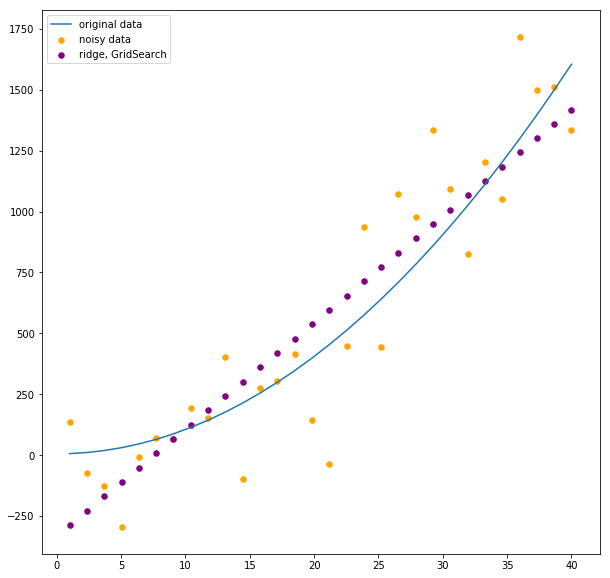

In [62]:

model = grid.best_estimator_

model.fit(X, y_noisy)
preds = model.predict(X)

plt.figure(figsize=(10,10))

clean_plt, = plt.plot(x, y, label="original data")
noisy_plt = plt.scatter(x, y_noisy, s=s, label="noisy data", c="orange")
ridge_plt = plt.scatter(x, preds, s=s, label="ridge, GridSearch",c="purple")
plt.legend(handles=[clean_plt, noisy_plt, ridge_plt])

In [63]:

from scipy.stats import uniform
from scipy.stats import randint

dists = {'polynomialfeatures__degree' : randint(0, 100),
              'ridge__alpha' : uniform(loc=0, scale=1000)}

grid = RandomizedSearchCV(RidgeRegression(), dists, cv=5, n_iter=100)

grid.fit(X, y_noisy)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('polynomialfeatures',
                                              PolynomialFeatures(degree=1,
                                                                 include_bias=True,
                                                                 interaction_only=False,
                                                                 order='C')),
                                             ('ridge',
                                              Ridge(alpha=0, copy_X=True,
                                                    fit_intercept=True,
                                                    max_iter=None,
                                                    normalize=False,
                                                    random_state=None,
                                                    solver='auto',
                                      

In [64]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'ridge__alpha': 881.5821741051558}

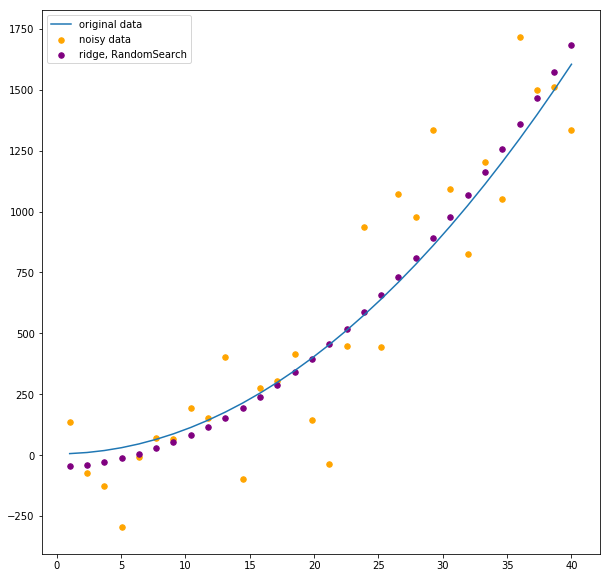

In [65]:
model = grid.best_estimator_

model.fit(X, y_noisy)
preds = model.predict(X)

plt.figure(figsize=(10,10))

clean_plt, = plt.plot(x, y, label="original data")
noisy_plt = plt.scatter(x, y_noisy, s=s, label="noisy data", c="orange")
ridge_plt = plt.scatter(x, preds, s=s, label="ridge, RandomSearch",c="purple")
plt.legend(handles=[clean_plt, noisy_plt, ridge_plt])

## There are more sophisticated methods for hyperparameter optimization

### Example: Bayesian Optimization
* Forms a probabilistic model of a mapping between the hyperparameters and their score on the objective function
* Evalutate hyperparameters which are both promising and the model is less certain about.(exploration-exploitation tradeoff)
* Iteratively update the model based on the evaluation

